In [2]:
import games
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.pool import Pool

# np.random.seed(50)

population = 100
num_groups = 20
num_generations = 150
num_simulations = 100
cooperation_threshold = int(1)
group_split_threshold = 10
group_split_method = 'empty'
group_split_probabilistic = False

cost_benefit_ratios = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

sd_args = [[population, num_groups, num_generations, r, cooperation_threshold, group_split_threshold, 
         group_split_method, group_split_probabilistic, 'snowdrift'] for r in cost_benefit_ratios]
pd_args = [[population, num_groups, num_generations, r, cooperation_threshold, group_split_threshold, 
         group_split_method, group_split_probabilistic, 'prisoners dilemma'] for r in cost_benefit_ratios]
args = sd_args + pd_args

with Pool() as pool:
    all_results = pool.starmap(games.group_split_game_many, [[num_simulations] + arg for arg in args])


In [3]:

population_per_gen = [[variant[j][3] for j in range(num_simulations)] for variant in all_results]
mean_population_per_gen = np.mean(population_per_gen, axis=1)
std_population_per_gen = np.std(population_per_gen, axis=1)

cooperation_per_gen = [[variant[j][4] for j in range(num_simulations)] for variant in all_results]
mean_cooperation_per_gen = np.mean(cooperation_per_gen, axis=1)
std_cooperation_per_gen = np.std(cooperation_per_gen, axis=1)

total_reward_per_gen = [[variant[j][5] for j in range(num_simulations)] for variant in all_results]
mean_total_reward_per_gen = np.mean(total_reward_per_gen, axis=1)
std_total_reward_per_gen = np.std(total_reward_per_gen, axis=1)

pass

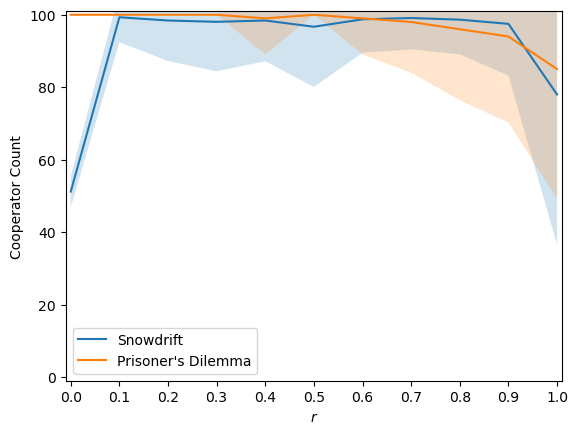

In [33]:

sd_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[:len(cost_benefit_ratios)]])
sd_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[:len(cost_benefit_ratios)]])
pd_mean_cooperation_final = np.array([simulation[-1] for simulation in mean_cooperation_per_gen[len(cost_benefit_ratios):]])
pd_std_cooperation_final = np.array([simulation[-1] for simulation in std_cooperation_per_gen[len(cost_benefit_ratios):]])

plt.plot(cost_benefit_ratios, sd_mean_cooperation_final, label="Snowdrift")
plt.fill_between(cost_benefit_ratios, sd_mean_cooperation_final - sd_std_cooperation_final, 
                 sd_mean_cooperation_final + sd_std_cooperation_final, alpha=0.2)

plt.plot(cost_benefit_ratios, pd_mean_cooperation_final, label="Prisoner's Dilemma")
plt.fill_between(cost_benefit_ratios, pd_mean_cooperation_final - pd_std_cooperation_final, 
                 pd_mean_cooperation_final + pd_std_cooperation_final, alpha=0.2)
plt.xticks(cost_benefit_ratios)
plt.xlim(-0.01, 1.01)
plt.ylim((-1, 101))
plt.ylabel('Cooperator Count')
plt.xlabel('$r$')
plt.legend()
# plt.grid()

plt.savefig("..\\figures\\var_cost_benefit_sd_pd.png", bbox_inches='tight', transparent=True)
plt.show()


# Snowdrift

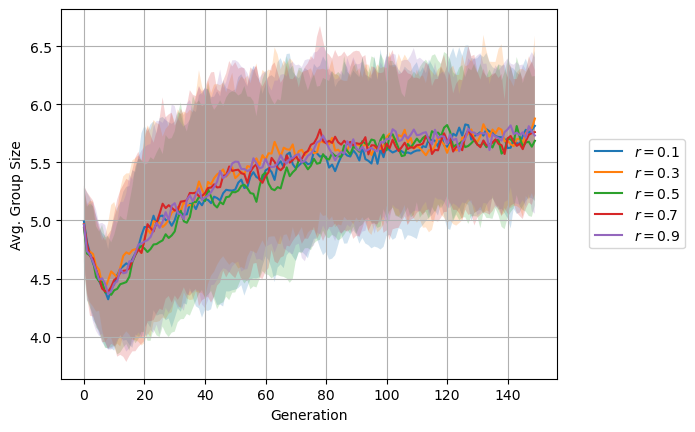

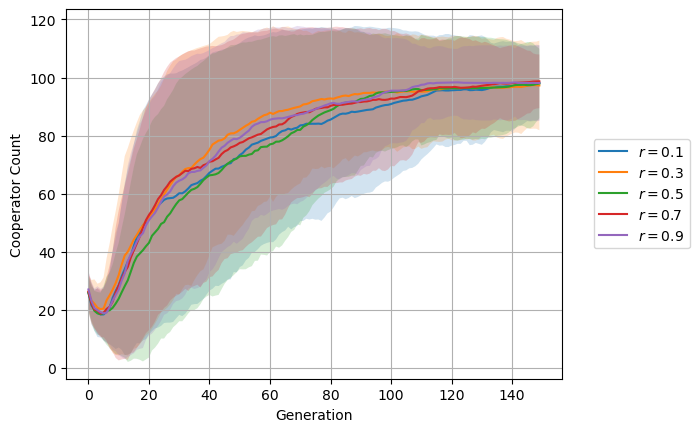

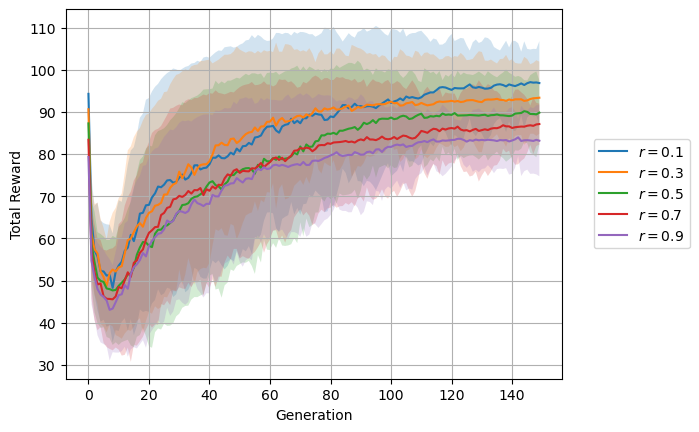

In [82]:

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(1, len(cost_benefit_ratios) - 1, 2):
    plt.plot(mean_population_per_gen[i], label=f'$r={cost_benefit_ratios[i]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_cost_benefit_y_avg_group_size_sd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(1, len(cost_benefit_ratios) - 1, 2):
    plt.plot(mean_cooperation_per_gen[i], label=f'$r={cost_benefit_ratios[i]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_cost_benefit_y_cooperation_sd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for i in range(1, len(cost_benefit_ratios) - 1, 2):
    plt.plot(mean_total_reward_per_gen[i], label=f'$r={cost_benefit_ratios[i]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_cost_benefit_y_total_reward_sd.png", bbox_inches='tight', transparent=True)
plt.show()


# SD Condensed Test

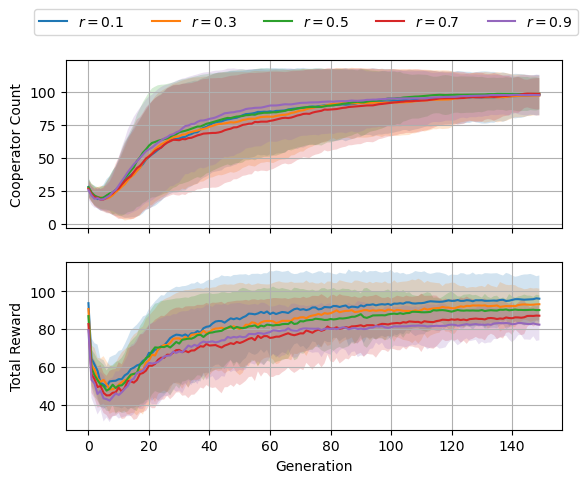

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6.4, 4.8))

for i in range(1, len(cost_benefit_ratios) - 1, 2):
    ax1.plot(mean_cooperation_per_gen[i], label=f'$r={cost_benefit_ratios[i]}$')
    ax1.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax1.set(ylabel='Cooperator Count')
ax1.grid()

for i in range(1, len(cost_benefit_ratios) - 1, 2):
    ax2.plot(mean_total_reward_per_gen[i], label='')
    ax2.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
ax2.set(xlabel='Generation', ylabel='Total Reward')
ax2.grid()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)

plt.savefig("..\\figures\\var_cost_benefit_condensed_sd.png", bbox_inches='tight', transparent=True)
plt.show()


# Prisoner's Dilemma

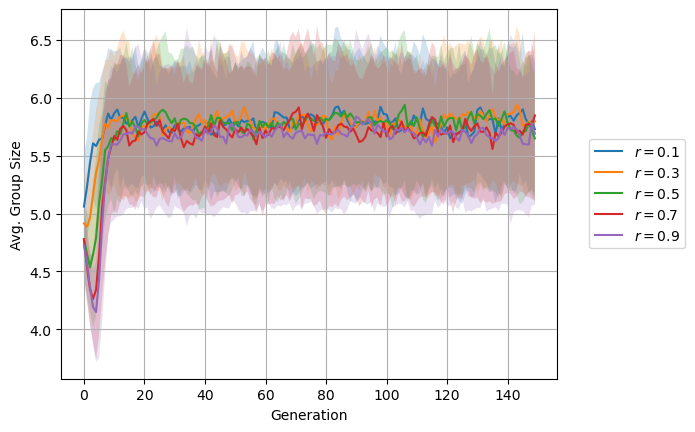

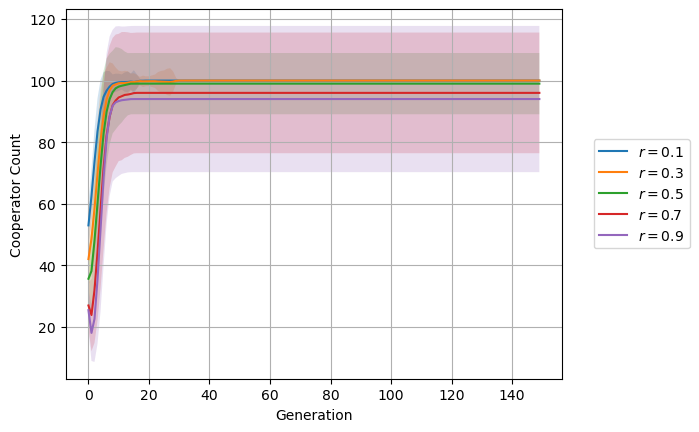

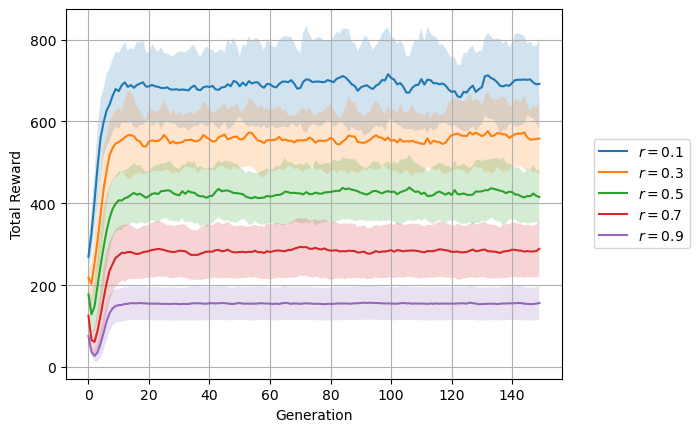

In [81]:

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for j in range(1, len(cost_benefit_ratios) - 1, 2):
    i = j + len(cost_benefit_ratios)
    plt.plot(mean_population_per_gen[i], label=f'$r={cost_benefit_ratios[j]}$')
    plt.fill_between(np.arange(num_generations), mean_population_per_gen[i] - std_population_per_gen[i], 
                     mean_population_per_gen[i] + std_population_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Avg. Group Size')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_cost_benefit_y_avg_group_size_pd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for j in range(1, len(cost_benefit_ratios) - 1, 2):
    i = j + len(cost_benefit_ratios)
    plt.plot(mean_cooperation_per_gen[i], label=f'$r={cost_benefit_ratios[j]}$')
    plt.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Cooperator Count')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_cost_benefit_y_cooperation_pd.png", bbox_inches='tight', transparent=True)
plt.show()

# plt.title(f'Group Split w/ Snowdrift Game\nVarying Cost/Benefit Ratio')
for j in range(1, len(cost_benefit_ratios) - 1, 2):
    i = j + len(cost_benefit_ratios)
    plt.plot(mean_total_reward_per_gen[i], label=f'$r={cost_benefit_ratios[j]}$')
    plt.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.ylabel('Total Reward')
plt.xlabel('Generation')
plt.grid()
plt.savefig("..\\figures\\var_cost_benefit_y_total_reward_pd.png", bbox_inches='tight', transparent=True)
plt.show()

# PD Condensed Test

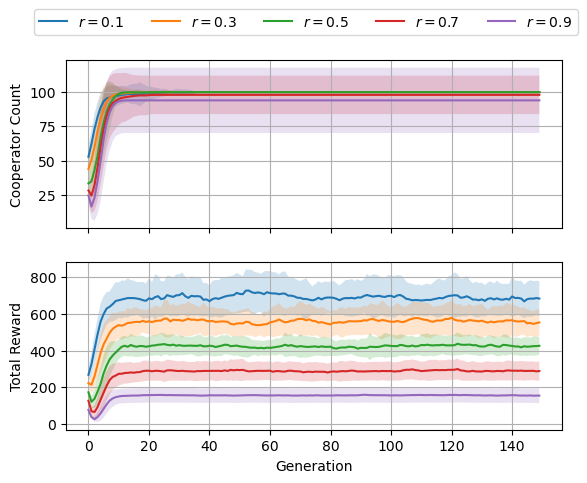

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6.4, 4.8))

for j in range(1, len(cost_benefit_ratios) - 1, 2):
    i = j + len(cost_benefit_ratios)
    ax1.plot(mean_cooperation_per_gen[i], label=f'$r={cost_benefit_ratios[j]}$')
    ax1.fill_between(np.arange(num_generations), mean_cooperation_per_gen[i] - std_cooperation_per_gen[i], 
                     mean_cooperation_per_gen[i] + std_cooperation_per_gen[i], alpha=0.2)
ax1.set(ylabel='Cooperator Count')
ax1.grid()

for j in range(1, len(cost_benefit_ratios) - 1, 2):
    i = j + len(cost_benefit_ratios)
    ax2.plot(mean_total_reward_per_gen[i], label='')
    ax2.fill_between(np.arange(num_generations), mean_total_reward_per_gen[i] - std_total_reward_per_gen[i], 
                     mean_total_reward_per_gen[i] + std_total_reward_per_gen[i], alpha=0.2)
ax2.set(xlabel='Generation', ylabel='Total Reward')
ax2.grid()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=5)

plt.savefig("..\\figures\\var_cost_benefit_condensed_pd.png", bbox_inches='tight', transparent=True)
plt.show()
